
#League of Legends Winner Prediction 
---

Usando dataset: https://www.kaggle.com/datasets/paololol/league-of-legends-ranked-matches

Proyecto de Inteligencia artificial creado por 

*   David Camilo García
*   Jose Andrés Echavarría
*   Juan José Ospina

Estudiantes de la Universidad De Antioquia






### Importación de archivos de Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paololol/league-of-legends-ranked-matches

 94% 176M/186M [00:01<00:00, 159MB/s]
100% 186M/186M [00:01<00:00, 167MB/s]


In [ ]:
!unzip league-of-legends-ranked-matches.zip

Archive:  league-of-legends-ranked-matches.zip
  inflating: champs.csv              
  inflating: matches.csv             
  inflating: participants.csv        
  inflating: stats1.csv              
  inflating: stats2.csv              
  inflating: teambans.csv            
  inflating: teamstats.csv           


##Dataset, Organización y limpieza de datos

In [ ]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
#Lectura de archivos
champs = pd.read_csv("champs.csv")
matches = pd.read_csv("matches.csv")
participants = pd.read_csv('participants.csv')
stats1 = pd.read_csv('stats1.csv')
stats2 = pd.read_csv('stats2.csv')
stats = stats1.append(stats2)

#Dimensiones de las estadísticas disponibles
stats.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1834517, 56)

In [ ]:
stats.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [ ]:
#Unión de datos stats, champs y matches
df = pd.merge(participants, stats, how = 'left', on = ['id'], suffixes=('', '_y'))

df = pd.merge(df , champs, how = 'left', left_on= 'championid', right_on='id'
             ,suffixes=('', '_y') )

df = pd.merge(df, matches, how = 'left', left_on = 'matchid', right_on = 'id'
              , suffixes=('', '_y'))

In [ ]:
#Columnas disponibles para trabajar
df.columns

Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
       'position', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood', 'name

In [ ]:
#Ajuste de rol para cada partida
def final_position(col):
    if col['role'] in ('DUO_SUPPORT', 'DUO_CARRY'):
        return col['role']
    else:
        return col['position']

df['adjposition'] = df.apply(final_position, axis = 1)

In [ ]:
df.head(10)

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,id_y,id_y,gameid,platformid,queueid,seasonid,duration,creation,version,adjposition
0,9,10,1,19,4,11,NONE,JUNGLE,0.0,3748.0,...,19,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,0.0,2301.0,...,267,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,DUO_SUPPORT
2,11,10,3,119,7,4,DUO_CARRY,BOT,0.0,1055.0,...,119,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,DUO_CARRY
3,12,10,4,114,12,4,SOLO,TOP,0.0,1029.0,...,114,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,TOP
4,13,10,5,112,4,3,SOLO,MID,0.0,3020.0,...,112,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,MID
5,14,10,6,72,11,4,NONE,JUNGLE,1.0,1400.0,...,72,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,JUNGLE
6,15,10,7,3,4,12,SOLO,TOP,1.0,3025.0,...,3,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,TOP
7,16,10,8,103,14,4,SOLO,MID,1.0,3135.0,...,103,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,MID
8,17,10,9,222,7,4,DUO_CARRY,BOT,1.0,3046.0,...,222,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,DUO_CARRY
9,18,10,10,161,14,4,DUO_SUPPORT,BOT,1.0,1058.0,...,161,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,DUO_SUPPORT


In [ ]:
df['team'] = df['player'].apply(lambda x: '1' if x <= 5 else '2')
df['team_role'] = df['team'] + ' - ' + df['adjposition']

In [ ]:
df.head(10)

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,...,gameid,platformid,queueid,seasonid,duration,creation,version,adjposition,team,team_role
0,9,10,1,19,4,11,NONE,JUNGLE,0.0,3748.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,JUNGLE,1,1 - JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,0.0,2301.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,DUO_SUPPORT,1,1 - DUO_SUPPORT
2,11,10,3,119,7,4,DUO_CARRY,BOT,0.0,1055.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,DUO_CARRY,1,1 - DUO_CARRY
3,12,10,4,114,12,4,SOLO,TOP,0.0,1029.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,TOP,1,1 - TOP
4,13,10,5,112,4,3,SOLO,MID,0.0,3020.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,MID,1,1 - MID
5,14,10,6,72,11,4,NONE,JUNGLE,1.0,1400.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,JUNGLE,2,2 - JUNGLE
6,15,10,7,3,4,12,SOLO,TOP,1.0,3025.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,TOP,2,2 - TOP
7,16,10,8,103,14,4,SOLO,MID,1.0,3135.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,MID,2,2 - MID
8,17,10,9,222,7,4,DUO_CARRY,BOT,1.0,3046.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,DUO_CARRY,2,2 - DUO_CARRY
9,18,10,10,161,14,4,DUO_SUPPORT,BOT,1.0,1058.0,...,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,DUO_SUPPORT,2,2 - DUO_SUPPORT


In [ ]:
#Removiendo roles duplicados por información perdida
remove_index = []
for i in ('1 - MID', '1 - TOP', '1 - DUO_SUPPORT', '1 - DUO_CARRY', '1 - JUNGLE',
          '2 - MID', '2 - TOP', '2 - DUO_SUPPORT', '2 - DUO_CARRY', '2 - JUNGLE'):
    df_remove = df[df['team_role'] == i].groupby('matchid').agg({'team_role':'count'})
    remove_index.extend(df_remove[df_remove['team_role'] != 1].index.values)

In [ ]:
#Removiendo partidas con información mal catalogada
remove_index.extend(df[df['adjposition'] == 'BOT']['matchid'].unique())
remove_index = list(set(remove_index))

In [ ]:
df = df[~df['matchid'].isin(remove_index)]
print('Partidas luego de la limpieza de datos:{}'.format(df['matchid'].nunique()))
df.shape

Partidas luego de la limpieza de datos:148638


(1486362, 76)

In [ ]:
df.columns

Index(['id', 'matchid', 'player', 'championid', 'ss1', 'ss2', 'role',
       'position', 'win', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'trinket', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'largestmultikill', 'killingsprees', 'longesttimespentliving',
       'doublekills', 'triplekills', 'quadrakills', 'pentakills',
       'legendarykills', 'totdmgdealt', 'magicdmgdealt', 'physicaldmgdealt',
       'truedmgdealt', 'largestcrit', 'totdmgtochamp', 'magicdmgtochamp',
       'physdmgtochamp', 'truedmgtochamp', 'totheal', 'totunitshealed',
       'dmgselfmit', 'dmgtoobj', 'dmgtoturrets', 'visionscore', 'timecc',
       'totdmgtaken', 'magicdmgtaken', 'physdmgtaken', 'truedmgtaken',
       'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', 'firstblood', 'name

In [ ]:
df = df[['id', 'matchid', 'player', 'name', 'adjposition', 'team_role',
         'win', 'kills', 'deaths', 'assists', 'turretkills','totdmgtochamp',
         'totheal', 'totminionskilled', 'goldspent', 'totdmgtaken', 'inhibkills',
         'pinksbought', 'wardsplaced', 'duration', 'platformid',
         'seasonid', 'version']]
df.head()

,id,matchid,player,name,adjposition,team_role,win,kills,deaths,assists,...,totminionskilled,goldspent,totdmgtaken,inhibkills,pinksbought,wardsplaced,duration,platformid,seasonid,version
0,9,10,1,Warwick,JUNGLE,1 - JUNGLE,0.0,6.0,10.0,1.0,...,42.0,10275.0,41446.0,0.0,0.0,10.0,1909,EUW1,8,7.10.187.9675
1,10,10,2,Nami,DUO_SUPPORT,1 - DUO_SUPPORT,0.0,0.0,2.0,12.0,...,17.0,7975.0,17769.0,0.0,1.0,17.0,1909,EUW1,8,7.10.187.9675
2,11,10,3,Draven,DUO_CARRY,1 - DUO_CARRY,0.0,7.0,8.0,5.0,...,205.0,11775.0,25627.0,0.0,1.0,13.0,1909,EUW1,8,7.10.187.9675
3,12,10,4,Fiora,TOP,1 - TOP,0.0,5.0,11.0,2.0,...,164.0,10683.0,31705.0,0.0,0.0,3.0,1909,EUW1,8,7.10.187.9675
4,13,10,5,Viktor,MID,1 - MID,0.0,2.0,8.0,2.0,...,235.0,10485.0,20585.0,0.0,0.0,10.0,1909,EUW1,8,7.10.187.9675


In [ ]:
#Corrigiendo datos de wards

df_v = df.copy()

df_v['wardsplaced'] = df_v['wardsplaced'].apply(lambda x: x if x<30 else 30)
df_v['wardsplaced'] = df_v['wardsplaced'].apply(lambda x: x if x>0 else 0)

df_v['wardsplaced'].head()

0    10.0
1    17.0
2    13.0
3     3.0
4    10.0
Name: wardsplaced, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Correlations - Win vs factors (All games)')

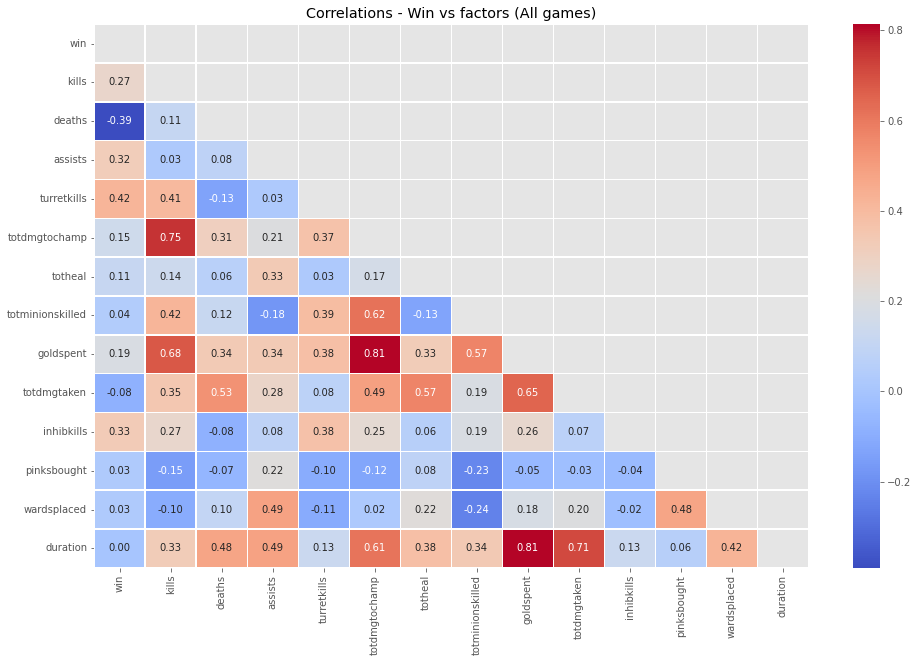

In [ ]:
df_corr = df._get_numeric_data()
df_corr = df_corr.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

m = np.zeros_like(df_corr.corr(), dtype=np.bool)
m[np.triu_indices_from(m)] = True

plt.figure(figsize=(16,10))
sns.heatmap(df_corr.corr(), cmap = 'coolwarm', annot= True, fmt = '.2f',
            linewidths=.5, mask = m)

plt.title('Correlations - Win vs factors (All games)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 1.0, 'Correlaciones - Win vs factors (-25 mins)')

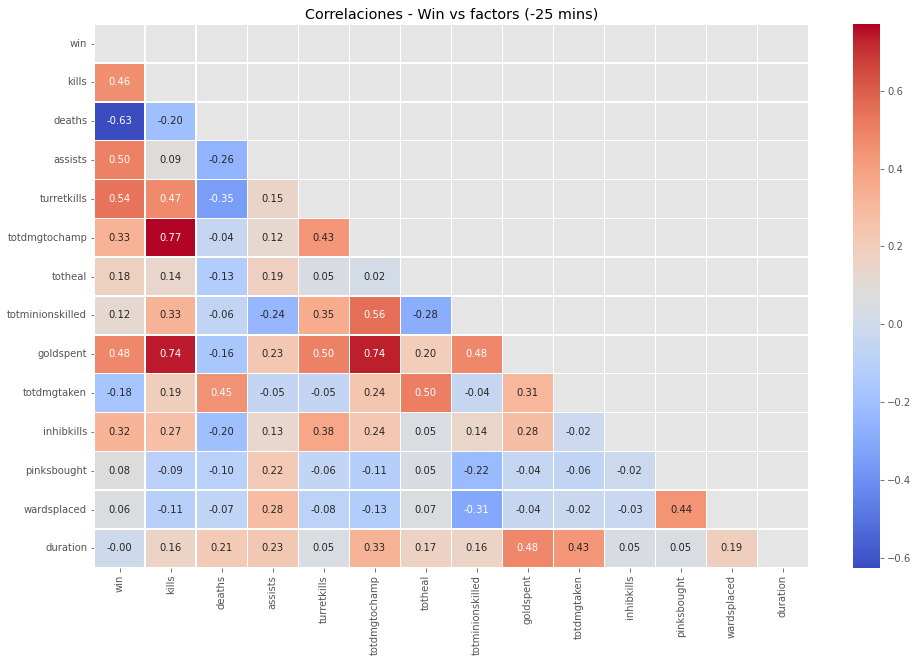

In [ ]:
df_corr_2 = df._get_numeric_data()
# Juegos cortos (-25 min)
df_corr_2 = df_corr_2[df_corr_2['duration'] <= 1500]
df_corr_2 = df_corr_2.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

m = np.zeros_like(df_corr_2.corr(), dtype=np.bool)
m[np.triu_indices_from(m)] = True

plt.figure(figsize=(16,10))
sns.heatmap(df_corr_2.corr(), cmap = 'coolwarm', annot= True, fmt = '.2f',
            linewidths=.5, mask = m)

plt.title('Correlaciones - Win vs factors (-25 mins)')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Text(0.5, 1.0, '\x7fCorrelaciones - Win vs factors (+40 min)')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0, flags=flags)


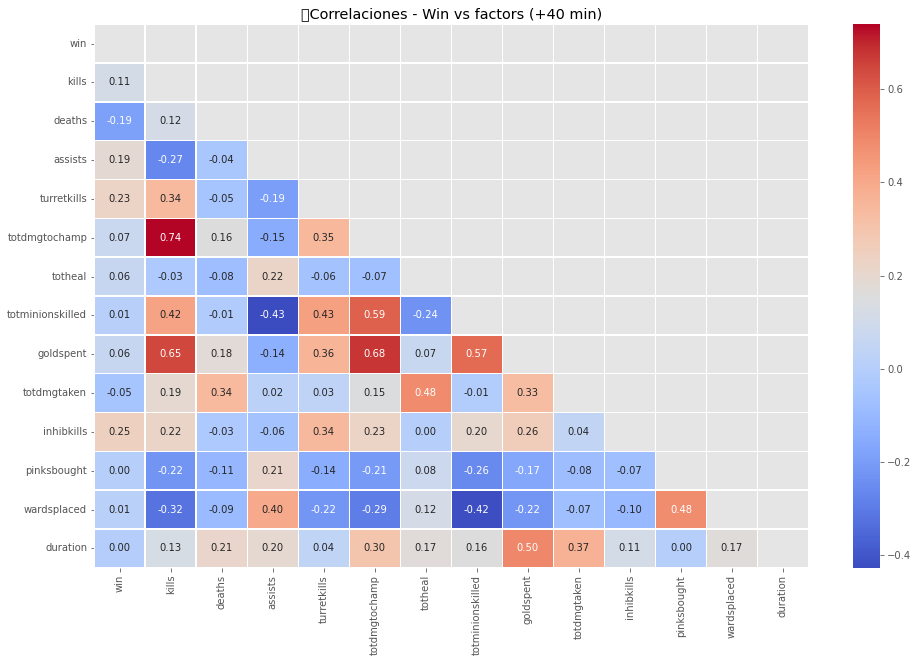

In [ ]:
df_corr_3 = df._get_numeric_data()
# Juegos largos (+40 min)
df_corr_3 = df_corr_3[df_corr_3['duration'] > 2400]
df_corr_3 = df_corr_3.drop(['id', 'matchid', 'player', 'seasonid'], axis = 1)

m = np.zeros_like(df_corr_3.corr(), dtype=np.bool)
m[np.triu_indices_from(m)] = True

plt.figure(figsize=(16,10))
sns.heatmap(df_corr_3.corr(), cmap = 'coolwarm', annot= True, fmt = '.2f',
            linewidths=.5, mask = m)

plt.title('Correlaciones - Win vs factors (+40 min)')

In [ ]:
df_win_rate = df.groupby('name').agg({'win': 'sum','name': 'count',
                                     'kills':'mean','deaths':'mean',
                                     'assists':'mean'})
df_win_rate.columns = ['win' , 'total matches', 'K', 'D', 'A']
df_win_rate['win rate'] = df_win_rate['win'] / df_win_rate['total matches'] * 100
df_win_rate['KDA'] = (df_win_rate['K'] + df_win_rate['A']) / df_win_rate['D']
df_win_rate = df_win_rate.sort_values('win rate',ascending= False)
df_win_rate = df_win_rate[['total matches', 'win rate' , 'K' , 'D', 'A', 'KDA']]

In [ ]:
print('Top 10 win rate')
print(df_win_rate.head(10))
print('Least 10 win rate')
print(df_win_rate.tail(10))

Top 10 win rate
          total matches   win rate         K         D          A       KDA
name                                                                       
Ivern              6671  55.868685  2.639934  4.156798  13.299505  3.834547
Anivia             6433  53.971708  6.372610  4.769625   7.544847  2.917935
Xerath             5108  53.621770  7.314996  5.444401   8.553837  2.914707
Ahri              30841  53.545605  7.264591  5.551621   7.711706  2.697644
Sona              11847  53.135815  2.971638  5.735629  13.947750  2.949875
Skarner            1720  53.081395  4.790698  5.021512   9.222674  2.790668
Zilean             4797  52.991453  3.155931  4.727747  11.909944  3.186693
KogMaw             6440  52.717391  7.931988  6.589596   7.125155  2.284987
Janna             21182  52.714569  0.872580  4.018365  14.476867  3.819824
Pantheon           8872  52.569883  8.068756  6.466186   6.837241  2.305222
Least 10 win rate
         total matches   win rate         K         D 

In [ ]:
df_2 = df.sort_values(['matchid','adjposition'], ascending = [1,1])

In [ ]:
df_2

,id,matchid,player,name,adjposition,team_role,win,kills,deaths,assists,...,totminionskilled,goldspent,totdmgtaken,inhibkills,pinksbought,wardsplaced,duration,platformid,seasonid,version
2,11,10,3,Draven,DUO_CARRY,1 - DUO_CARRY,0.0,7.0,8.0,5.0,...,205.0,11775.0,25627.0,0.0,1.0,13.0,1909,EUW1,8,7.10.187.9675
8,17,10,9,Jinx,DUO_CARRY,2 - DUO_CARRY,1.0,15.0,3.0,9.0,...,191.0,14375.0,17655.0,2.0,1.0,6.0,1909,EUW1,8,7.10.187.9675
1,10,10,2,Nami,DUO_SUPPORT,1 - DUO_SUPPORT,0.0,0.0,2.0,12.0,...,17.0,7975.0,17769.0,0.0,1.0,17.0,1909,EUW1,8,7.10.187.9675
9,18,10,10,VelKoz,DUO_SUPPORT,2 - DUO_SUPPORT,1.0,4.0,5.0,19.0,...,72.0,11675.0,13443.0,0.0,5.0,25.0,1909,EUW1,8,7.10.187.9675
0,9,10,1,Warwick,JUNGLE,1 - JUNGLE,0.0,6.0,10.0,1.0,...,42.0,10275.0,41446.0,0.0,0.0,10.0,1909,EUW1,8,7.10.187.9675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834518,1865603,187588,9,Riven,JUNGLE,2 - JUNGLE,0.0,2.0,11.0,3.0,...,53.0,9430.0,31790.0,0.0,0.0,8.0,2534,NA1,5,5.20.0.291
1834510,1865595,187588,1,Twisted Fate,MID,1 - MID,1.0,3.0,14.0,7.0,...,190.0,11900.0,29670.0,0.0,0.0,10.0,2534,NA1,5,5.20.0.291
1834516,1865601,187588,7,Annie,MID,2 - MID,0.0,11.0,9.0,7.0,...,189.0,12575.0,21003.0,0.0,0.0,13.0,2534,NA1,5,5.20.0.291
1834513,1865598,187588,4,Malphite,TOP,1 - TOP,1.0,7.0,4.0,22.0,...,150.0,12880.0,26215.0,0.0,3.0,11.0,2534,NA1,5,5.20.0.291


In [ ]:
df_2['shift 1'] = df_2['name'].shift()
df_2['shift -1'] = df_2['name'].shift(-1)

In [ ]:
df_2

,id,matchid,player,name,adjposition,team_role,win,kills,deaths,assists,...,totdmgtaken,inhibkills,pinksbought,wardsplaced,duration,platformid,seasonid,version,shift 1,shift -1
2,11,10,3,Draven,DUO_CARRY,1 - DUO_CARRY,0.0,7.0,8.0,5.0,...,25627.0,0.0,1.0,13.0,1909,EUW1,8,7.10.187.9675,NaN,Jinx
8,17,10,9,Jinx,DUO_CARRY,2 - DUO_CARRY,1.0,15.0,3.0,9.0,...,17655.0,2.0,1.0,6.0,1909,EUW1,8,7.10.187.9675,Draven,Nami
1,10,10,2,Nami,DUO_SUPPORT,1 - DUO_SUPPORT,0.0,0.0,2.0,12.0,...,17769.0,0.0,1.0,17.0,1909,EUW1,8,7.10.187.9675,Jinx,VelKoz
9,18,10,10,VelKoz,DUO_SUPPORT,2 - DUO_SUPPORT,1.0,4.0,5.0,19.0,...,13443.0,0.0,5.0,25.0,1909,EUW1,8,7.10.187.9675,Nami,Warwick
0,9,10,1,Warwick,JUNGLE,1 - JUNGLE,0.0,6.0,10.0,1.0,...,41446.0,0.0,0.0,10.0,1909,EUW1,8,7.10.187.9675,VelKoz,Skarner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834518,1865603,187588,9,Riven,JUNGLE,2 - JUNGLE,0.0,2.0,11.0,3.0,...,31790.0,0.0,0.0,8.0,2534,NA1,5,5.20.0.291,Xin Zhao,Twisted Fate
1834510,1865595,187588,1,Twisted Fate,MID,1 - MID,1.0,3.0,14.0,7.0,...,29670.0,0.0,0.0,10.0,2534,NA1,5,5.20.0.291,Riven,Annie
1834516,1865601,187588,7,Annie,MID,2 - MID,0.0,11.0,9.0,7.0,...,21003.0,0.0,0.0,13.0,2534,NA1,5,5.20.0.291,Twisted Fate,Malphite
1834513,1865598,187588,4,Malphite,TOP,1 - TOP,1.0,7.0,4.0,22.0,...,26215.0,0.0,3.0,11.0,2534,NA1,5,5.20.0.291,Annie,Olaf


In [ ]:
#Definimos los Enfrentamientos singulares
def matchup(x):
    if x['player'] <= 5:
        if x['name'] < x['shift -1']:
            name_return = x['name'] + ' vs ' + x['shift -1']
        else:
            name_return = x['shift -1'] + ' vs ' + x['name']
    else:
        if x['name'] < x['shift 1']:
            name_return = x['name'] + ' vs ' + x['shift 1']
        else:
            name_return = x['shift 1'] + ' vs ' + x['name']
    return name_return

df_2['matchup'] = df_2.apply(matchup, axis = 1)
df_2['win_adj'] = df_2.apply(lambda x: x['win'] if x['name'] == x['matchup'].split(' vs')[0]
                            else 0, axis = 1)

In [ ]:
df_2.head(10)

,id,matchid,player,name,adjposition,team_role,win,kills,deaths,assists,...,pinksbought,wardsplaced,duration,platformid,seasonid,version,shift 1,shift -1,matchup,win_adj
2,11,10,3,Draven,DUO_CARRY,1 - DUO_CARRY,0.0,7.0,8.0,5.0,...,1.0,13.0,1909,EUW1,8,7.10.187.9675,NaN,Jinx,Draven vs Jinx,0.0
8,17,10,9,Jinx,DUO_CARRY,2 - DUO_CARRY,1.0,15.0,3.0,9.0,...,1.0,6.0,1909,EUW1,8,7.10.187.9675,Draven,Nami,Draven vs Jinx,0.0
1,10,10,2,Nami,DUO_SUPPORT,1 - DUO_SUPPORT,0.0,0.0,2.0,12.0,...,1.0,17.0,1909,EUW1,8,7.10.187.9675,Jinx,VelKoz,Nami vs VelKoz,0.0
9,18,10,10,VelKoz,DUO_SUPPORT,2 - DUO_SUPPORT,1.0,4.0,5.0,19.0,...,5.0,25.0,1909,EUW1,8,7.10.187.9675,Nami,Warwick,Nami vs VelKoz,0.0
0,9,10,1,Warwick,JUNGLE,1 - JUNGLE,0.0,6.0,10.0,1.0,...,0.0,10.0,1909,EUW1,8,7.10.187.9675,VelKoz,Skarner,Skarner vs Warwick,0.0
5,14,10,6,Skarner,JUNGLE,2 - JUNGLE,1.0,3.0,3.0,9.0,...,0.0,8.0,1909,EUW1,8,7.10.187.9675,Warwick,Viktor,Skarner vs Warwick,1.0
4,13,10,5,Viktor,MID,1 - MID,0.0,2.0,8.0,2.0,...,0.0,10.0,1909,EUW1,8,7.10.187.9675,Skarner,Ahri,Ahri vs Viktor,0.0
7,16,10,8,Ahri,MID,2 - MID,1.0,13.0,4.0,8.0,...,0.0,8.0,1909,EUW1,8,7.10.187.9675,Viktor,Fiora,Ahri vs Viktor,1.0
3,12,10,4,Fiora,TOP,1 - TOP,0.0,5.0,11.0,2.0,...,0.0,3.0,1909,EUW1,8,7.10.187.9675,Ahri,Galio,Fiora vs Galio,0.0
6,15,10,7,Galio,TOP,2 - TOP,1.0,4.0,5.0,11.0,...,1.0,7.0,1909,EUW1,8,7.10.187.9675,Fiora,Cassiopeia,Fiora vs Galio,0.0


In [ ]:
df_matchup = df_2.groupby(['adjposition', 'matchup']).agg({'win_adj': 'sum', 'matchup': 'count'})
df_matchup.columns = ['win matches', 'total matches']
df_matchup['total matches'] = df_matchup['total matches'] / 2
df_matchup['win rate'] = df_matchup['win matches'] /  df_matchup['total matches']  * 100
df_matchup['dominant score'] = df_matchup['win rate'] -50
df_matchup['dominant score (ND)'] = abs(df_matchup['dominant score'])
df_matchup = df_matchup[df_matchup['total matches'] > df_matchup['total matches'].sum()*0.0001]

df_matchup = df_matchup.sort_values('dominant score (ND)', ascending = False)
df_matchup = df_matchup[['total matches', 'dominant score']]                   
df_matchup = df_matchup.reset_index()

print('Score dominante -/+ Significa primer, o segundo campeón dominante:')

for i in df_matchup['adjposition'].unique(): 
        print('\n{}:'.format(i))
        print(df_matchup[df_matchup['adjposition'] == i].iloc[:,1:].head(5))

Score dominante -/+ Significa primer, o segundo campeón dominante:

MID:
                 matchup  total matches  dominant score
0          Annie vs Ryze           80.0       25.000000
1           Ahri vs Ryze          319.0       21.159875
8            Azir vs Lux          150.0      -14.666667
12  Ryze vs Twisted Fate           78.0      -14.102564
13          Ekko vs Ryze          130.0       13.846154

JUNGLE:
               matchup  total matches  dominant score
2   Rengar vs Xin Zhao          200.0      -17.500000
4    Evelynn vs Rengar          118.0       15.254237
5    Hecarim vs Twitch           89.0       15.168539
10     Graves vs Ivern          410.0      -14.390244
11          Nunu vs Vi           95.0       14.210526

TOP:
                matchup  total matches  dominant score
3   Gangplank vs Singed          102.0       15.686275
6       Yasuo vs Yorick          109.0       15.137615
9         Shen vs Teemo          189.0      -14.550265
14      Maokai vs Yasuo         

In [ ]:
df_matchup['adjposition'].unique()

df_matchup_TOP = df_matchup.loc[df_matchup['adjposition'] == 'TOP']
df_matchup_JUNGLE = df_matchup.loc[df_matchup['adjposition'] == 'JUNGLE']
df_matchup_MID = df_matchup.loc[df_matchup['adjposition'] == 'MID']
df_matchup_DUO_CARRY = df_matchup.loc[df_matchup['adjposition'] == 'DUO_CARRY']
df_matchup_DUO_SUPPORT = df_matchup.loc[df_matchup['adjposition'] == 'DUO_SUPPORT']

print(df_matchup_TOP.shape)
print(df_matchup_JUNGLE.shape)
print(df_matchup_MID.shape)
print(df_matchup_DUO_CARRY.shape)
print(df_matchup_DUO_SUPPORT.shape)

(525, 4)
(391, 4)
(435, 4)
(138, 4)
(272, 4)


In [ ]:
df_matchup['matchup']

0             Annie vs Ryze
1              Ahri vs Ryze
2        Rengar vs Xin Zhao
3       Gangplank vs Singed
4         Evelynn vs Rengar
               ...         
1756      Garen vs Vladimir
1757       Gragas vs Thresh
1758       Gnar vs Renekton
1759      Kayle vs Renekton
1760        Irelia vs Poppy
Name: matchup, Length: 1761, dtype: object

In [ ]:
df_matchup

,adjposition,matchup,total matches,dominant score
0,MID,Annie vs Ryze,80.0,25.000000
1,MID,Ahri vs Ryze,319.0,21.159875
2,JUNGLE,Rengar vs Xin Zhao,200.0,-17.500000
3,TOP,Gangplank vs Singed,102.0,15.686275
4,JUNGLE,Evelynn vs Rengar,118.0,15.254237
...,...,...,...,...
1756,TOP,Garen vs Vladimir,80.0,0.000000
1757,DUO_SUPPORT,Gragas vs Thresh,144.0,0.000000
1758,TOP,Gnar vs Renekton,234.0,0.000000
1759,TOP,Kayle vs Renekton,126.0,0.000000


In [ ]:
def winner(List1, List2):
  for i in range(len(List1)):
    if (List1[i] +" vs "+List2[i]) in df_matchup['matchup']:
      score = -df_matchup['dominant score']
    else:
      print('nope')

List1 = ['Garen','Gragas'] 
List2 = ['Vladimir ', 'Thresh ']

a = winner(List1, List2)

nope
nope


In [ ]:
df_matchup.dtypes

adjposition        object
matchup            object
total matches     float64
dominant score    float64
dtype: object

In [ ]:
df_matchup['matchup'] = df_matchup['matchup'].astype("string")

df_matchup.dtypes

adjposition        object
matchup            string
total matches     float64
dominant score    float64
dtype: object

In [ ]:
'Annie vs Ryze' in df_matchup['matchup']

a = df_matchup[df_matchup['matchup'].str.contains('Annie vs Ryze', case=False,na = False)]['dominant score']

a.shape

a

0    25.0
Name: dominant score, dtype: float64